In [1]:
import torch


In [9]:
import pandas as pd
from IPython.display import display
df=pd.DataFrame()
for name in ["nice_","nicer_"]:#["bestever_","final_cov_","ML4Jets_30","momentum_","with_momentum_small_"]:
    for p in ["t"]:
        name_temp=name+p
        try:
            df=pd.concat((df,pd.read_csv("/beegfs/desy/user/kaechben/{}/summary.csv".format(name_temp))))
        except:
            print(name_temp)
df=df[df.step>20000]
with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
    
    display(df.sort_values("val_fpnd"))



,path_index,autoreg,batch_size,batchnorm,bins,bullshitbingo,bullshitbingo2,canonical,clf,context_features,corr,coupling_layers,disc,dropout,fc,frac_pretrain,freq,gen_mask,heads,hidden,l_dim,lambda,last_clf,limit,lr,lr_d,lr_g,lr_nf,mass,max_epochs,max_steps,n_dim,n_part,name,network_layers,network_layers_nf,network_nodes_nf,no_hidden,no_hidden_gen,num_layers,opt,parton,quantile,ratio,scalingbullshit,sched,seed,tail_bound,val_check,variable,warmup,wgan,momentum,val_logprob,val_fpnd,val_mmd,val_cov,val_w1m,val_w1efp,val_w1p,step,time
50,/beegfs/desy/user/kaechben/nice_t/lightning_lo...,False,3096.0,False,5.0,True,True,False,True,0.0,True,15.0,False,0.15,False,80.0,5.0,True,4.0,128.0,24.0,1.0,False,150000.0,0.001,0.00030,0.0003,0.000722,False,3600.0,100000.0,3.0,30.0,nice_t,3.0,2.0,256.0,True,more,7.0,RMSprop,t,False,1.0,True,NaN,69.0,6.0,50.0,1.0,1600.0,False,False,-0.329011,0.250926,0.071013,0.582,0.001658,0.000034,0.001011,153159.0,40685.421187
87,/beegfs/desy/user/kaechben/nice_t/lightning_lo...,False,1024.0,False,5.0,True,False,False,True,0.0,True,15.0,False,0.10,False,80.0,5.0,True,4.0,256.0,80.0,1.0,False,150000.0,0.001,0.00030,0.0003,0.000722,False,3600.0,100000.0,3.0,30.0,nice_t,3.0,2.0,256.0,True,more,4.0,RMSprop,t,False,1.0,True,cosine2,69.0,6.0,50.0,1.0,800.0,False,False,-0.359915,0.256464,0.070994,0.582,0.001284,0.000039,0.001106,463309.0,89692.042017
61,/beegfs/desy/user/kaechben/nice_t/lightning_lo...,False,3096.0,False,5.0,False,False,False,True,0.0,True,15.0,False,0.10,False,80.0,5.0,True,6.0,512.0,180.0,1.0,False,150000.0,0.001,0.00009,0.0001,0.000722,False,4800.0,100000.0,3.0,30.0,nice_t,3.0,2.0,256.0,more,True,5.0,Adam,t,False,0.9,True,NaN,69.0,6.0,50.0,1.0,800.0,False,False,-0.368944,0.264983,0.070581,0.595,0.001504,0.000038,0.001049,152579.0,62035.036540
74,/beegfs/desy/user/kaechben/nice_t/lightning_lo...,False,1024.0,False,5.0,True,True,False,True,0.0,True,15.0,False,0.05,False,80.0,5.0,True,4.0,256.0,80.0,1.0,False,150000.0,0.001,0.00009,0.0001,0.000722,False,3600.0,100000.0,3.0,30.0,nice_t,3.0,2.0,256.0,more,False,5.0,RMSprop,t,False,0.9,True,linear,69.0,6.0,50.0,1.0,1200.0,False,True,-0.399412,0.319742,0.071578,0.560,0.001231,0.000032,0.003050,463309.0,77181.073579
49,/beegfs/desy/user/kaechben/nice_t/lightning_lo...,False,3096.0,False,5.0,True,False,False,True,0.0,True,15.0,False,0.05,False,80.0,5.0,True,4.0,756.0,100.0,1.0,False,150000.0,0.001,0.00013,0.0001,0.000722,True,4800.0,100000.0,3.0,30.0,nice_t,3.0,2.0,256.0,more,more,4.0,Adam,t,False,1.3,True,linear,69.0,6.0,50.0,1.0,800.0,False,False,-0.124536,0.428163,0.072552,0.583,0.000907,0.000024,0.001434,78644.0,42232.108511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,/beegfs/desy/user/kaechben/nice_t/lightning_lo...,False,1024.0,False,5.0,False,True,False,True,0.0,True,15.0,False,0.15,False,80.0,5.0,True,4.0,756.0,32.0,1.0,False,150000.0,0.001,0.00013,0.0001,0.000722,False,4800.0,100000.0,3.0,30.0,nice_t,3.0,2.0,256.0,True,more,7.0,Adam,t,False,1.3,True,cosine2,69.0,6.0,50.0,1.0,800.0,False,True,-0.203848,6.789485,0.072076,0.554,0.006341,0.000188,0.002866,22929.0,6413.211655
27,/beegfs/desy/user/kaechben/nice_t/lightning_lo...,False,1024.0,False,5.0,True,True,False,True,0.0,True,15.0,False,0.05,False,80.0,5.0,True,4.0,128.0,40.0,1.0,False,150000.0,0.001,0.00039,0.0003,0.000722,False,3600.0,100000.0,3.0,30.0,nice_t,3.0,2.0,256.0,more,True,7.0,RMSprop,t,False,1.3,True,linear,69.0,6.0,50.0,1.0,1600.0,False,True,-0.242235,6.883957,0.074721,0.544,0.004755,0.000133,0.002820,24684.0,5239.341724
84,/beegfs/desy/user/kaechben/nice_t/lightning_lo...,False,1024.0,False,5.0,False,True,False,True,0.0,True,15.0,False,0.05,False,80.0,5.0,True,4.0,1024.0,120.0,1.0,False,150000.0,0.001,0.00030,0.0003,0.000722,False,6000.0,100000.0,3.0,30.0,nice_t,3.0,2.0,256.0,

31


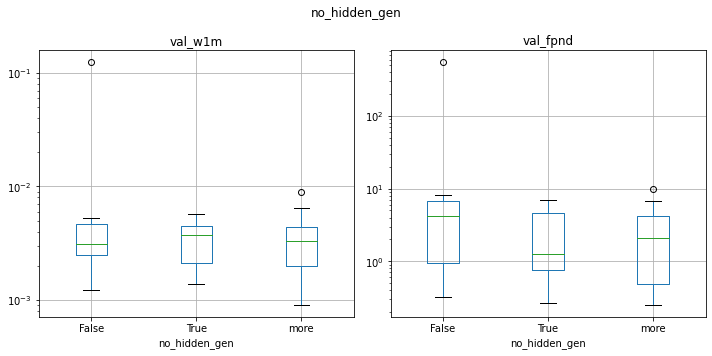

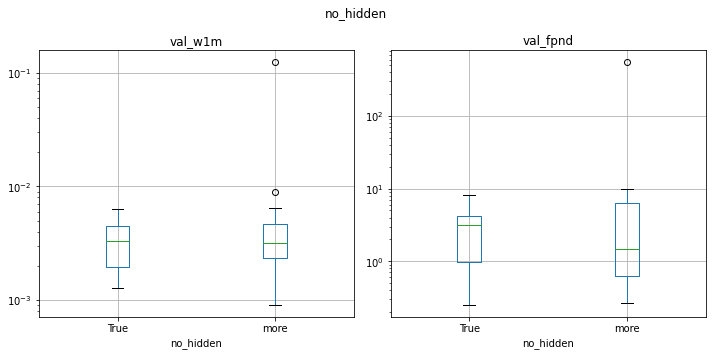

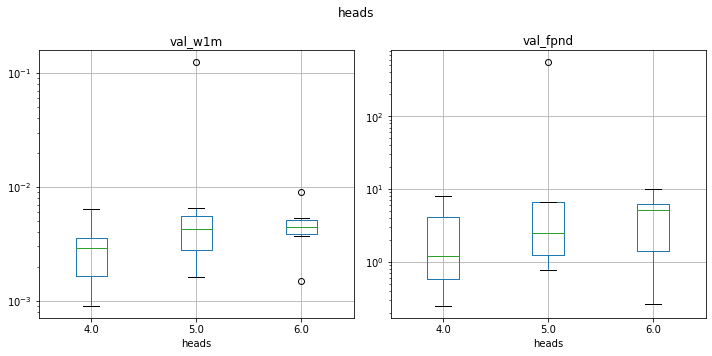

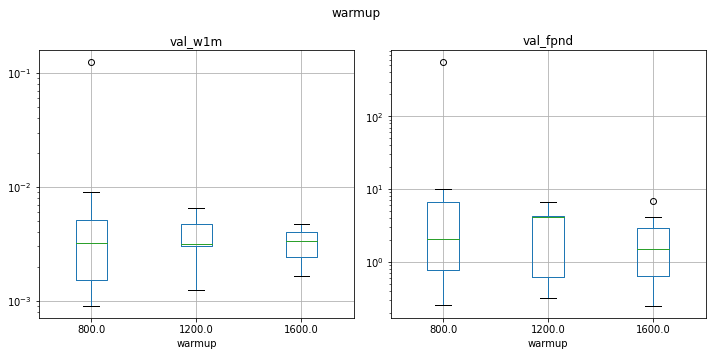

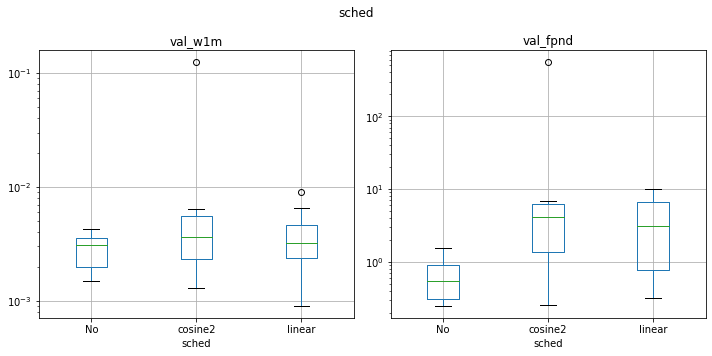

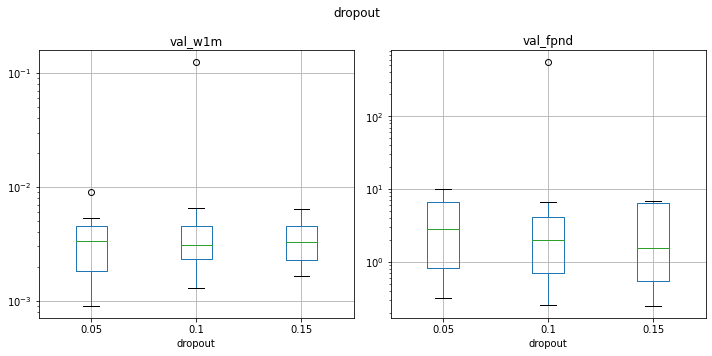

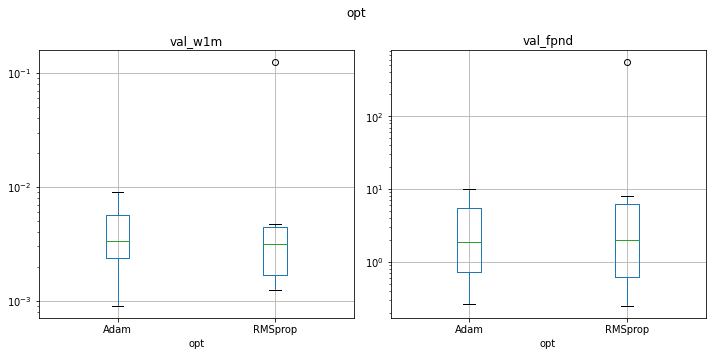

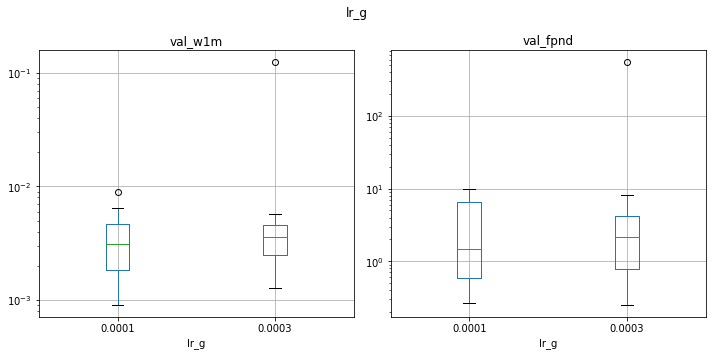

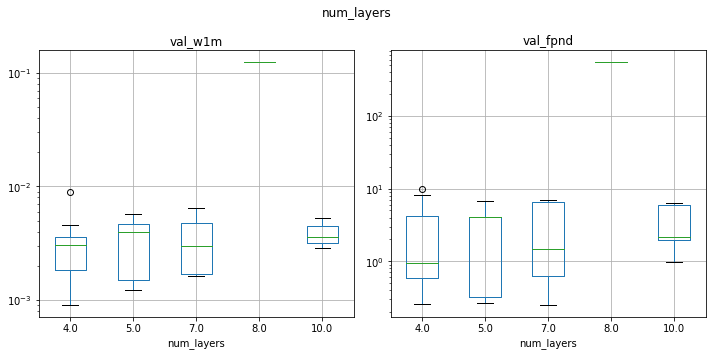

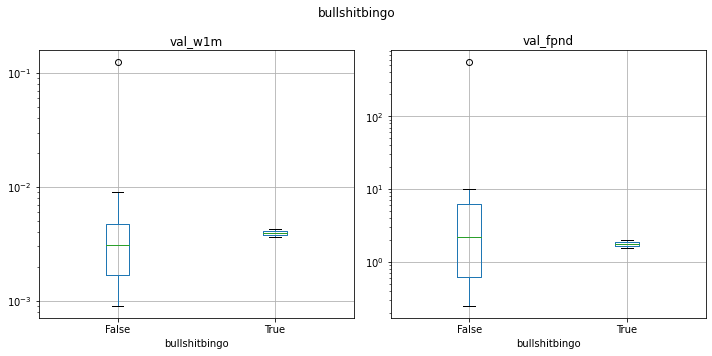

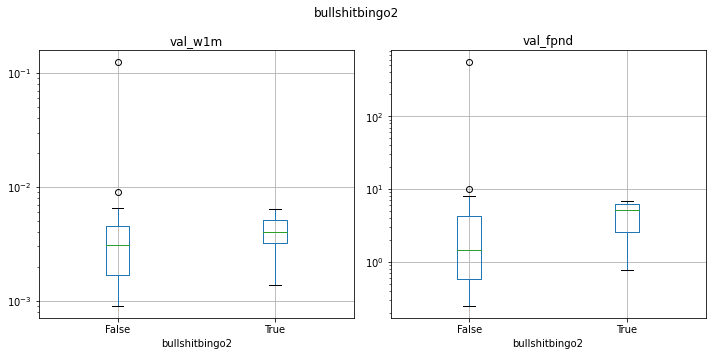

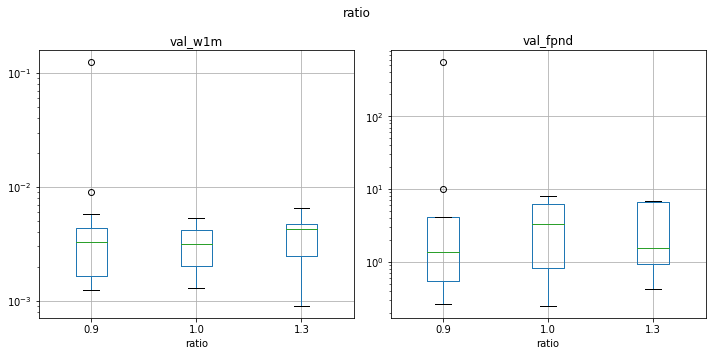

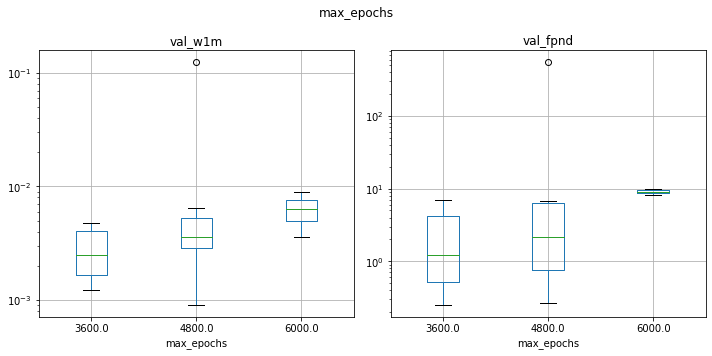

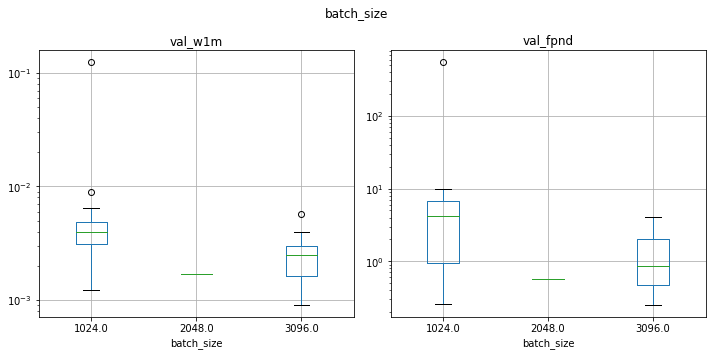

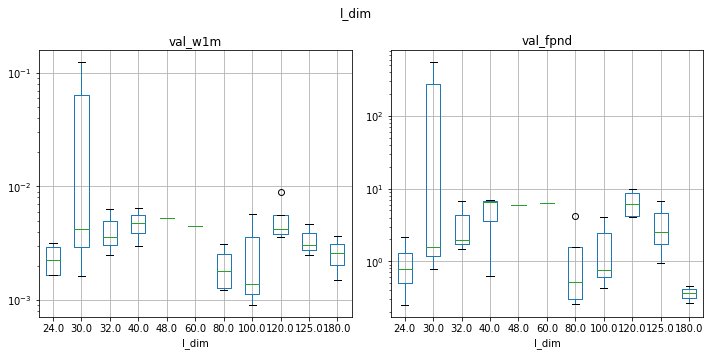

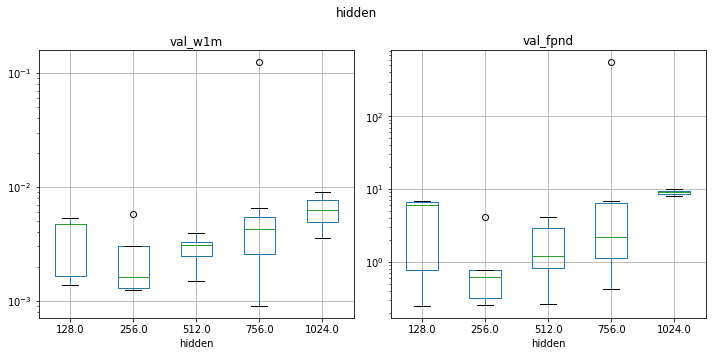

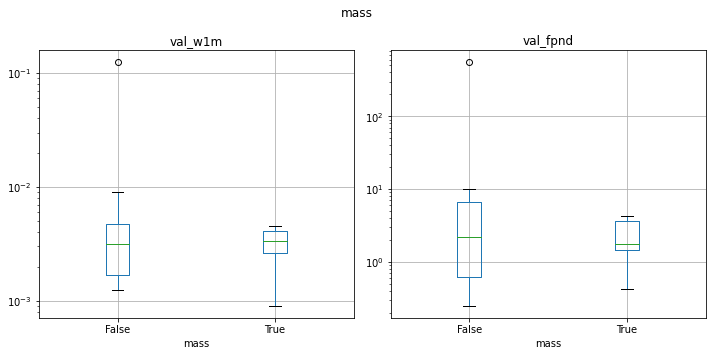

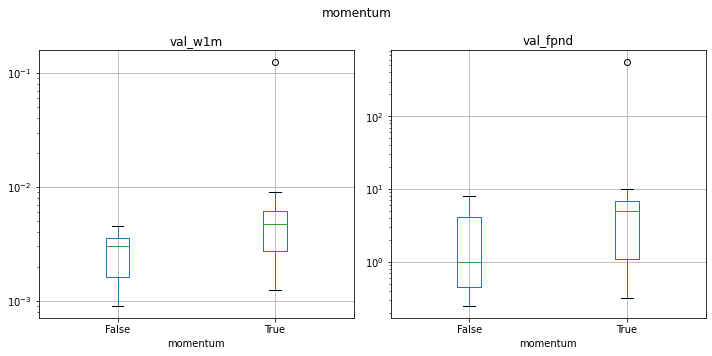

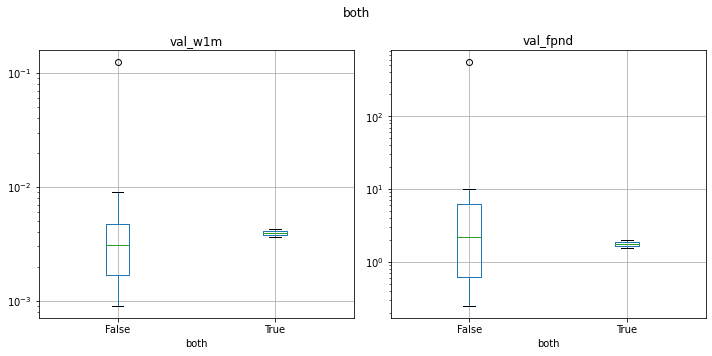

In [10]:
import matplotlib.pyplot as plt
df.loc[df["sched"]!=df["sched"],"sched"]="No"
df["sched"]=df["sched"].astype(str)
df["no_hidden_gen"]=df["no_hidden_gen"].astype(str)
df["no_hidden"]=df["no_hidden"].astype(str)
df=df[df["freq"]>1]
df.loc[(df["bullshitbingo2"])&(~(df["sched"]=="cosine2")),"bullshitbingo2"]=False
df.loc[(df["bullshitbingo"])&(~(df["momentum"])),"bullshitbingo"]=False
df.loc[(df["bullshitbingo"])&(~(df["mass"])),"bullshitbingo"]=False
print(len(df))
df["both"]=(df["mass"]* df["momentum"]).astype(bool)
for key in ["last_clf","no_hidden_gen","no_hidden","heads","gen_mask","warmup","sched","freq","dropout","opt","lr_g","num_layers","bullshitbingo","bullshitbingo2","scalingbullshit","ratio","max_epochs","batch_size","l_dim","hidden","mass","momentum","both"]:
    df=df[df.lr_g!=0.01]
#     df=df[df.val_fpnd>5]
    df=df[df[key]==df[key]]
#     fig,ax=plt.subplots(1,2,figsize=(10,5))
    
#     ax[0].scatter(df[key].astype("category").cat.codes,df["val_w1m"],alpha=0.3)
#     ax[0].set_xticks(list(set(df[key].astype("category").cat.codes)))
#     ax[0].set_xticklabels(df[key].astype("category").cat.categories)
#     ax[1].scatter(df[key].astype("category").cat.codes,df["val_fpnd"],alpha=0.3)
#     ax[1].set_xticks(list(set(df[key].astype("category").cat.codes)))
#     ax[1].set_xticklabels(df[key].astype("category").cat.categories)
#     ax[0].set_yscale("log")
#     ax[1].set_yscale("log")
#     ax[1].set_xlabel("fpnd")
#     ax[0].set_xlabel("w1m")
#     fig.suptitle(key)
    

#     plt.show()$
    if len(df[key].value_counts())==1:
           continue
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    ax[1].set_xlabel(key)
    ax[0].set_xlabel(key)
    ax[1].set_xlabel("fpnd")
    ax[0].set_xlabel("w1m")
    df.boxplot("val_w1m",key,ax[0], showfliers=True)
    df.boxplot("val_fpnd",key,ax[1], showfliers=True)
    fig.suptitle(key)
    ax[0].set_yscale("log")
    ax[1].set_yscale("log")
    plt.tight_layout()
    plt.show()